In [8]:
#libarys
#using APIs from twitter and reddit
#Doing some scarping from google and yahoo finance
#using pandas and seaborn
#
#
#
#NLTK Vader
#Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for
#Sentiment Analysis of Social Media Text. Eighth International Conference on
#Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.

import pandas, seaborn, datetime, re; seaborn.set()
import matplotlib.pyplot as plt

import socialdata as social
from stockdata import Stockdata as stock 
from datacleaner import Cleaner

%matplotlib inline

In [9]:
clean = Cleaner()
key = 'Apple'
ticker = 'AAPL'.upper()
subreddit = 'finance'

start_t = datetime.datetime(2015,2,1) #date to start the stock data and end
end_t = datetime.datetime.now() 

reads = social.Socialmedia(subreddit=subreddit,limit=30,keywords=key)
scraper = social.Webscraper()
#xmlRead = scraper.scrapexml()
redditRead = reads.reddit()
twitterRead = reads.twitter()
newsRead = scraper.scrapenews(keywords=key)


In [10]:
twitter = clean.social_cleaner(twitterRead)
reddit = clean.social_cleaner(redditRead)
#xmlr = clean.social_cleaner(xmlRead, source='xml')
newsr = clean.social_cleaner(newsRead)

In [11]:
Tesla = stock(stockname=ticker, startfrom=start_t, endto=end_t)#ERROR HANDLING DAT?!?!?!?!
TeslaData = Tesla.stockdata()

In [12]:
listofdb = [twitter,reddit,newsr]
finaldb = pandas.concat(listofdb)
finaldb.sort_index(inplace=True)
#finaldb.index = finaldb.index.dayofweek  < 5 

In [13]:
newTesla = TeslaData.dropna()
newTesla = TeslaData.reindex(finaldb.index,method='backfill')
newTesla = newTesla[~newTesla.reset_index().duplicated().values]
#TeslaData.dropna(inplace=True)
#TeslaData.reindex_like(finaldb.index)
dfnew = pandas.merge(finaldb,newTesla['Close'], left_on=finaldb.index, right_index=True)
dfnew.dropna(inplace=True)

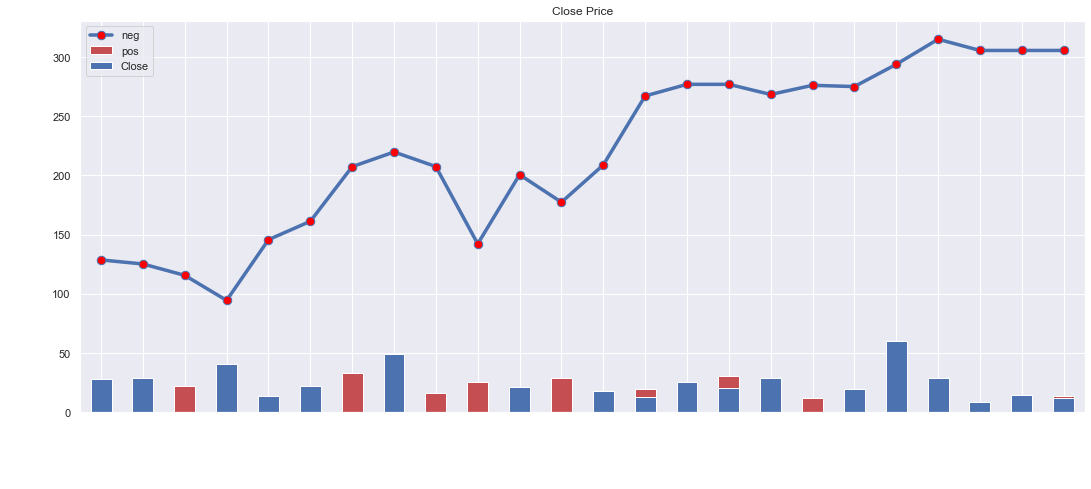

In [14]:
sx=dfnew['neg'].plot(kind='bar',
                legend='POS/NEG values',
                color='r',
                figsize=(18,8))
sx.tick_params(axis='x', colors='white')
sx2=dfnew['pos'].plot(kind='bar',
                legend='POS/NEG values')
sx3=dfnew['Close'].plot(kind='line',
                        linewidth=3.5,
                        use_index=False,
                        marker="o",
                        markersize=8.5,
                        markerfacecolor='red',
                        legend='Closing Price',
                        title='Close Price')
sx3.tick_params(axis='x', colors='white')